**EXPERIMENT 4**

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_58 (Conv2D)           (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d_46 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_72 (Dropout)         (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 14, 14, 128)       102528    
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
dropout_73 (Dropout)         (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 7, 7, 256)         819456    
__________

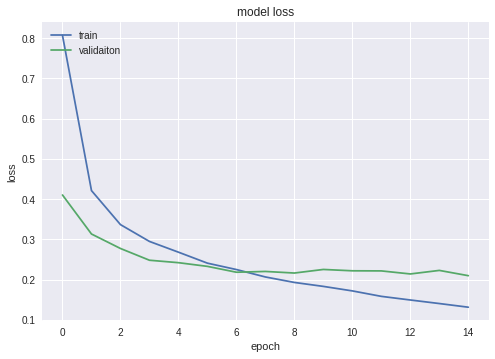

In [0]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# MNIST data
fashion_mnist = keras.datasets.fashion_mnist
 
# train and test images and labels of them.
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


# labels corresponding to categories.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Preprocessing
train_images = train_images / 255.0
test_images = test_images / 255.0
meanTrain = np.mean(train_images)
test_images = test_images - meanTrain
train_images = train_images - meanTrain
#for one hot encoding(for different loss functions).
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)


#reshape
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)   

train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)


model_4 = tf.keras.Sequential([
    tf.keras.layers.Convolution2D(32, (3, 3), padding='same', activation='relu', kernel_initializer='random_uniform', input_shape=(28,28,1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Convolution2D(128, (5, 5), padding='same', activation='relu', kernel_initializer='random_uniform'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Convolution2D(256, (5, 5), padding='same', activation='relu', kernel_initializer='random_uniform'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Convolution2D(512, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units = 10, activation = 'softmax')       
])

model_4.summary()
    
model_4.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


history_4 = model_4.fit(train_images, train_labels,
                    epochs=15, 
                    validation_split=0.1,
                    batch_size=256
                    )

# test loss and test accuracy. Evaluate the model
test_loss, test_acc = model_4.evaluate(test_images, test_labels)

print(test_loss, test_acc)
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validaiton'], loc='upper left')
plt.show()
